## K Nearest Neighbour Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=3, # 3 total features
     n_redundant=1,
    n_classes=2, # binary target/label 
    random_state=999 
)

In [3]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred=classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [17]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[157  19]
 [ 12 142]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       176
           1       0.88      0.92      0.90       154

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [11]:
## Task 
GridsearchCV
for i k=1,2,3,4,5,6,7,8,9,10

## K best 

SyntaxError: invalid syntax (1670823703.py, line 3)

# Hyperparameter Tuning


KNN Hyperparameter Tuning Results:
k = 1 -> Accuracy = 0.8800
k = 2 -> Accuracy = 0.9050
k = 3 -> Accuracy = 0.9000
k = 4 -> Accuracy = 0.9050
k = 5 -> Accuracy = 0.9000
k = 6 -> Accuracy = 0.9000
k = 7 -> Accuracy = 0.8900
k = 8 -> Accuracy = 0.8950
k = 9 -> Accuracy = 0.8900
k = 10 -> Accuracy = 0.8900

Best Hyperparameter:
Best k = 2
Best Accuracy = 0.9050


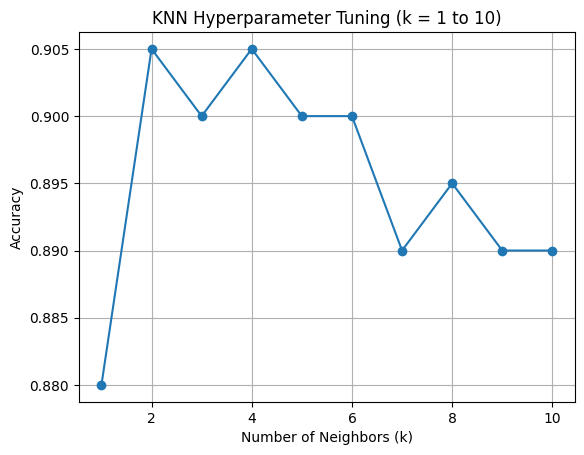

In [18]:
# -----------------------------
# 1. Import required libraries
# -----------------------------
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# -----------------------------
# 2. Create synthetic dataset
# -----------------------------
X, y = make_classification(
    n_samples=1000,       # total data points
    n_features=3,         # total features
    n_redundant=1,        # redundant feature
    n_classes=2,          # binary classification
    random_state=999      # reproducibility
)


# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% test data
    random_state=42,
    stratify=y            # preserve class ratio
)


# -----------------------------
# 4. Hyperparameter tuning
#    k = 1 to 10
# -----------------------------
accuracy_scores = {}

for k in range(1, 11):
    # Initialize KNN with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit model (store training data)
    knn.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Store accuracy for current k
    accuracy_scores[k] = acc


# -----------------------------
# 5. Print accuracy for each k
# -----------------------------
print("KNN Hyperparameter Tuning Results:")
for k, acc in accuracy_scores.items():
    print(f"k = {k} -> Accuracy = {acc:.4f}")


# -----------------------------
# 6. Find best k
# -----------------------------
best_k = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_k]

print("\nBest Hyperparameter:")
print(f"Best k = {best_k}")
print(f"Best Accuracy = {best_accuracy:.4f}")


# -----------------------------
# 7. Train final model
# -----------------------------
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

final_predictions = final_knn.predict(X_test)


# -----------------------------
# 8. Visualization
# -----------------------------
plt.plot(
    list(accuracy_scores.keys()),
    list(accuracy_scores.values()),
    marker='o'
)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning (k = 1 to 10)")
plt.grid(True)
plt.show()


In [19]:
# -----------------------------
# 1. Import libraries
# -----------------------------
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# -----------------------------
# 2. Create dataset
# -----------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_redundant=1,
    n_classes=2,
    random_state=999
)


# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# -----------------------------
# 4. Create pipeline
#    (Scaling is mandatory for KNN)
# -----------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


# -----------------------------
# 5. Define hyperparameter grid
# -----------------------------
param_grid = {
    'knn__n_neighbors': list(range(1, 11)),   # k = 1 to 10
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


# -----------------------------
# 6. GridSearchCV
# -----------------------------
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1                # use all CPU cores
)

# Run grid search
grid_search.fit(X_train, y_train)


# -----------------------------
# 7. Best hyperparameters
# -----------------------------
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest CV Accuracy:")
print(grid_search.best_score_)


# -----------------------------
# 8. Evaluate on test data
# -----------------------------
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:")
print(test_accuracy)


Best Parameters:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

Best CV Accuracy:
0.9075000000000001

Test Accuracy:
0.875


In [22]:
grid_search.cv_results_

{'mean_fit_time': array([0.00544848, 0.00431676, 0.00266676, 0.00353479, 0.00300322,
        0.00335131, 0.00324283, 0.00332808, 0.00315027, 0.00306091,
        0.00288196, 0.00269279, 0.00334759, 0.00296707, 0.00393634,
        0.00321746, 0.00321436, 0.00293956, 0.00305204, 0.00261483,
        0.0033031 , 0.0026299 , 0.00258322, 0.00259132, 0.00358524,
        0.00233111, 0.00242791, 0.00228901, 0.00783072, 0.00236449,
        0.00675354, 0.00704298, 0.00237436, 0.0039845 , 0.00306072,
        0.00305033, 0.00287104, 0.00276337, 0.00414667, 0.00320625]),
 'std_fit_time': array([9.90805468e-04, 8.39067754e-04, 7.96744615e-04, 3.71823050e-04,
        2.33040354e-04, 5.05835155e-04, 1.43650595e-04, 1.08008971e-03,
        4.57669472e-04, 4.61624193e-04, 3.04728807e-04, 2.08963655e-04,
        4.24677593e-04, 4.67234806e-04, 1.55323606e-03, 5.54988575e-04,
        4.51381822e-04, 4.49853457e-04, 6.16770688e-04, 3.21751525e-04,
        9.06623938e-04, 2.58766113e-04, 2.87965722e-04, 3.811

In [20]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)


In [21]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005448,0.000991,0.016241,0.001049,euclidean,1,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.88750,0.89375,0.83125,0.87500,0.89375,0.87625,0.023519,36
1,0.004317,0.000839,0.005400,0.002574,euclidean,1,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.88750,0.89375,0.83125,0.87500,0.89375,0.87625,0.023519,36
2,0.002667,0.000797,0.011766,0.005374,euclidean,2,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.86875,0.91875,0.81875,0.85000,0.88125,0.86750,0.033166,39
3,0.003535,0.000372,0.003445,0.000366,euclidean,2,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.88750,0.89375,0.83125,0.87500,0.89375,0.87625,0.023519,36
4,0.003003,0.000233,0.014980,0.002924,euclidean,3,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.90000,0.92500,0.86875,0.88750,0.91875,0.90000,0.020540,8
5,0.003351,0.000506,0.003857,0.000657,euclidean,3,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.90000,0.91875,0.85625,0.89375,0.91250,0.89625,0.021866,29
6,0.003243,0.000144,0.015891,0.003508,euclidean,4,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.90000,0.93750,0.84375,0.91250,0.90000,0.89875,0.030721,13
7,0.003328,0.001080,0.003572,0.000644,euclidean,4,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.89375,0.93125,0.86250,0.90625,0.90625,0.90000,0.022361,8
8,0.003150,0.000458,0.015288,0.003040,euclidean,5,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.90625,0.92500,0.87500,0.90000,0.91875,0.90500,0.017410,3
9,0.003061,0.000462,0.004082,0.001010,euclidean,5,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.90625,0.92500,0.87500,0.90000,0.91875,0.90500,0.017410,3


In [25]:
k_vs_acc = (
    results
    .groupby("param_knn__n_neighbors")["mean_test_score"]
    .mean()
)

In [26]:
k_vs_acc

param_knn__n_neighbors
1     0.880000
2     0.872812
3     0.900000
4     0.898438
5     0.903437
6     0.896875
7     0.898125
8     0.896563
9     0.900000
10    0.898438
Name: mean_test_score, dtype: float64

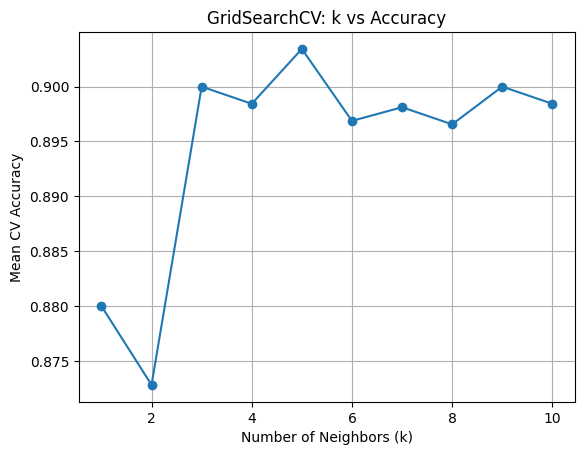

In [23]:
import matplotlib.pyplot as plt

# Average accuracy for each k (ignoring other params)
k_vs_acc = (
    results
    .groupby("param_knn__n_neighbors")["mean_test_score"]
    .mean()
)

plt.plot(k_vs_acc.index, k_vs_acc.values, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("GridSearchCV: k vs Accuracy")
plt.grid(True)
plt.show()


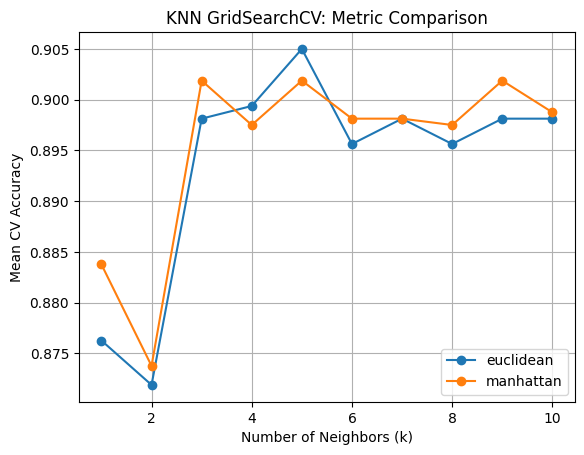

In [24]:
for metric in results["param_knn__metric"].unique():
    subset = results[results["param_knn__metric"] == metric]
    
    k_vs_acc = (
        subset
        .groupby("param_knn__n_neighbors")["mean_test_score"]
        .mean()
    )
    
    plt.plot(k_vs_acc.index, k_vs_acc.values, marker='o', label=metric)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("KNN GridSearchCV: Metric Comparison")
plt.legend()
plt.grid(True)
plt.show()
